## 1. Exploring Fancy Indexing

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
# We can pass a single list or array of indices to obtain the same result:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using **fancy indexing**, the **shape** of the result reflects **the shape of the index arrays** rather than **the shape of the array being indexed**:

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

**Fancy indexing** also works in **multiple dimensions**. Consider the following array:

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Like with **standard indexing**, the first index refers to the row, and the second to the column:

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Notice that the first value in the result is **X[0, 2]**, the second is **X[1, 1]**, and the third is **X[2, 3]**. 

If we **combine a column vector** and **a row vector within the indices**, we get a two-dimensional result:

In [8]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [9]:
col

array([2, 1, 3])

In [10]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Here, **each row value** is matched with **each column vector**, exactly as we saw in **broadcasting** of arithmetic operations. For example:

In [11]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [12]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

It is always important to remember with **fancy indexing** that the return value **reflects the broadcasted shape of the indices**, rather than the **shape of the array being indexed**.

## 2. Combined Indexing

For even more **powerful operations**, **fancy indexing** can be **combined** with the other indexing schemes **we've seen**:

In [13]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can **combine fancy and simple indices**:

In [14]:
X[2, [2, 0, 1]]

array([10,  8,  9])

We can also combine **fancy indexing with slicing**:

In [15]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

![title](pic_2.jpg)

In [18]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## 3. Example: Selecting Random Points

We might have an **N by D** matrix representing **N** points in **D** dimensions, such as the following points drawn from a **two-dimensional normal distribution**:

In [19]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
# mean -> 平均值   cov -> 协方差矩阵
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

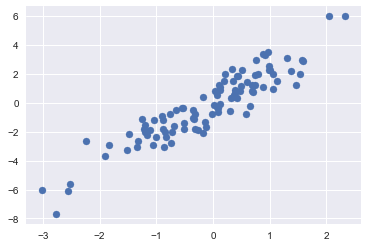

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select **20 random points**. We'll do this by first choosing **20 random indices** with no **repeats**, and use these **indices** to select a **portion** of the **original array**:

In [22]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([49, 38,  7, 75, 89, 77, 39, 62, 59, 16, 97, 92, 45,  6, 37, 87, 20,
       15,  9, 48])

In [23]:
selection = X[indices]  # fancy indexing here
print("selection: ", selection)
print("selection.shape: ", selection.shape)

selection:  [[ 0.33399913  2.32597923]
 [ 0.35936721  0.40554974]
 [ 0.35282131  1.49875397]
 [-1.03637857 -1.18469125]
 [ 0.51575983  2.30284639]
 [ 0.30414557 -0.5828419 ]
 [-0.90649669 -0.93486441]
 [ 0.10259314  1.24690575]
 [ 0.21115245  2.00781492]
 [-3.0236127  -6.00766046]
 [ 0.09619333 -0.64335574]
 [ 0.12065651  1.13236323]
 [ 2.32083881  5.97698647]
 [ 1.46860232  1.22961093]
 [ 0.44457363  1.87828298]
 [-2.56215914 -6.08410838]
 [ 1.58115602  2.86410319]
 [ 0.75093031  2.99487004]
 [ 0.0843329  -0.3543059 ]
 [ 0.57532883 -0.79997124]]
selection.shape:  (20, 2)


Now to see which points were **selected**, let's **over-plot** **large circles** at the locations of the selected points:

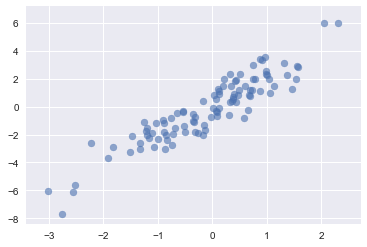

In [29]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

## 4. Modifying Values with Fancy Indexing

Just as **fancy indexing** can be used to access parts of an array, it can also be used to modify **parts of an array**.

In [30]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


We can use any **assignment-type operator** for this. For example:

In [31]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice, though, that **repeated indices** with these operations can cause some **potentially unexpected results**.
Where did the **4** go? The result of this operation is to first assign **x[0] = 4**, followed by **x[0] = 6**. The result, of course, is that **x[0]** contains the value **6**.

In [33]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Notice, though, that **repeated indices** with these **operations** can cause some **potentially unexpected results**

In [34]:
# 这不是多次发生的增强，而是赋值，这导致了相当不直观的结果。
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

In [35]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


## 5. Example: Binning Data

 For example, imagine we have **1,000 values** and would like to quickly find where they fall within **an array of bins**.

**i = np.searchsorted(bins, x)**

In [36]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

The counts now reflect **the number of points** within each bin–in other words, a histogram:

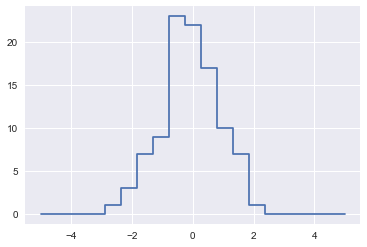

In [37]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

Of course, it would be silly to have to do this each time you want to **plot a histogram**. This is why Matplotlib provides the **plt.hist() routine**, which does the same in a **single line**:

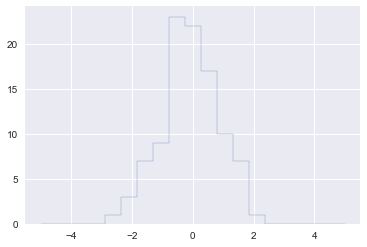

In [38]:
plt.hist(x, bins, histtype='step');

This function will create a nearly **identical plot** to the one seen here. To compute the **binning**, matplotlib uses the **np.histogram function**, which does a very **similar computation** to what we did before. Let's compare the two here:

In [39]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
56.7 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
18.2 µs ± 509 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Our own **one-line algorithm** is several times **faster** than the **optimized algorithm in NumPy!** How can this be? If you dig into the **np.histogram** source code (you can do this in IPython by typing np.histogram??), you'll see that it's **quite a bit more involved** than the simple search-and-count that we've done; this is because **NumPy's algorithm is more flexible**, and particularly is designed for better performance when the number of data points becomes **large**:

In [40]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
71.2 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
134 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


What this **comparison** shows is that algorithmic **efficiency** is almost never a simple question. An algorithm **efficient** for **large datasets** will not always be the **best choice** for **small datasets**, and vice versa (see Big-O Notation). But the **advantage** of coding this algorithm yourself is that with an **understanding of these basic methods**, you could use these **building blocks** to extend this to do some very interesting custom behaviors. The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like np.histogram and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.